In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [7]:
url="https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&page=1"
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
 
webpage=requests.get(url,headers=headers).text

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.app
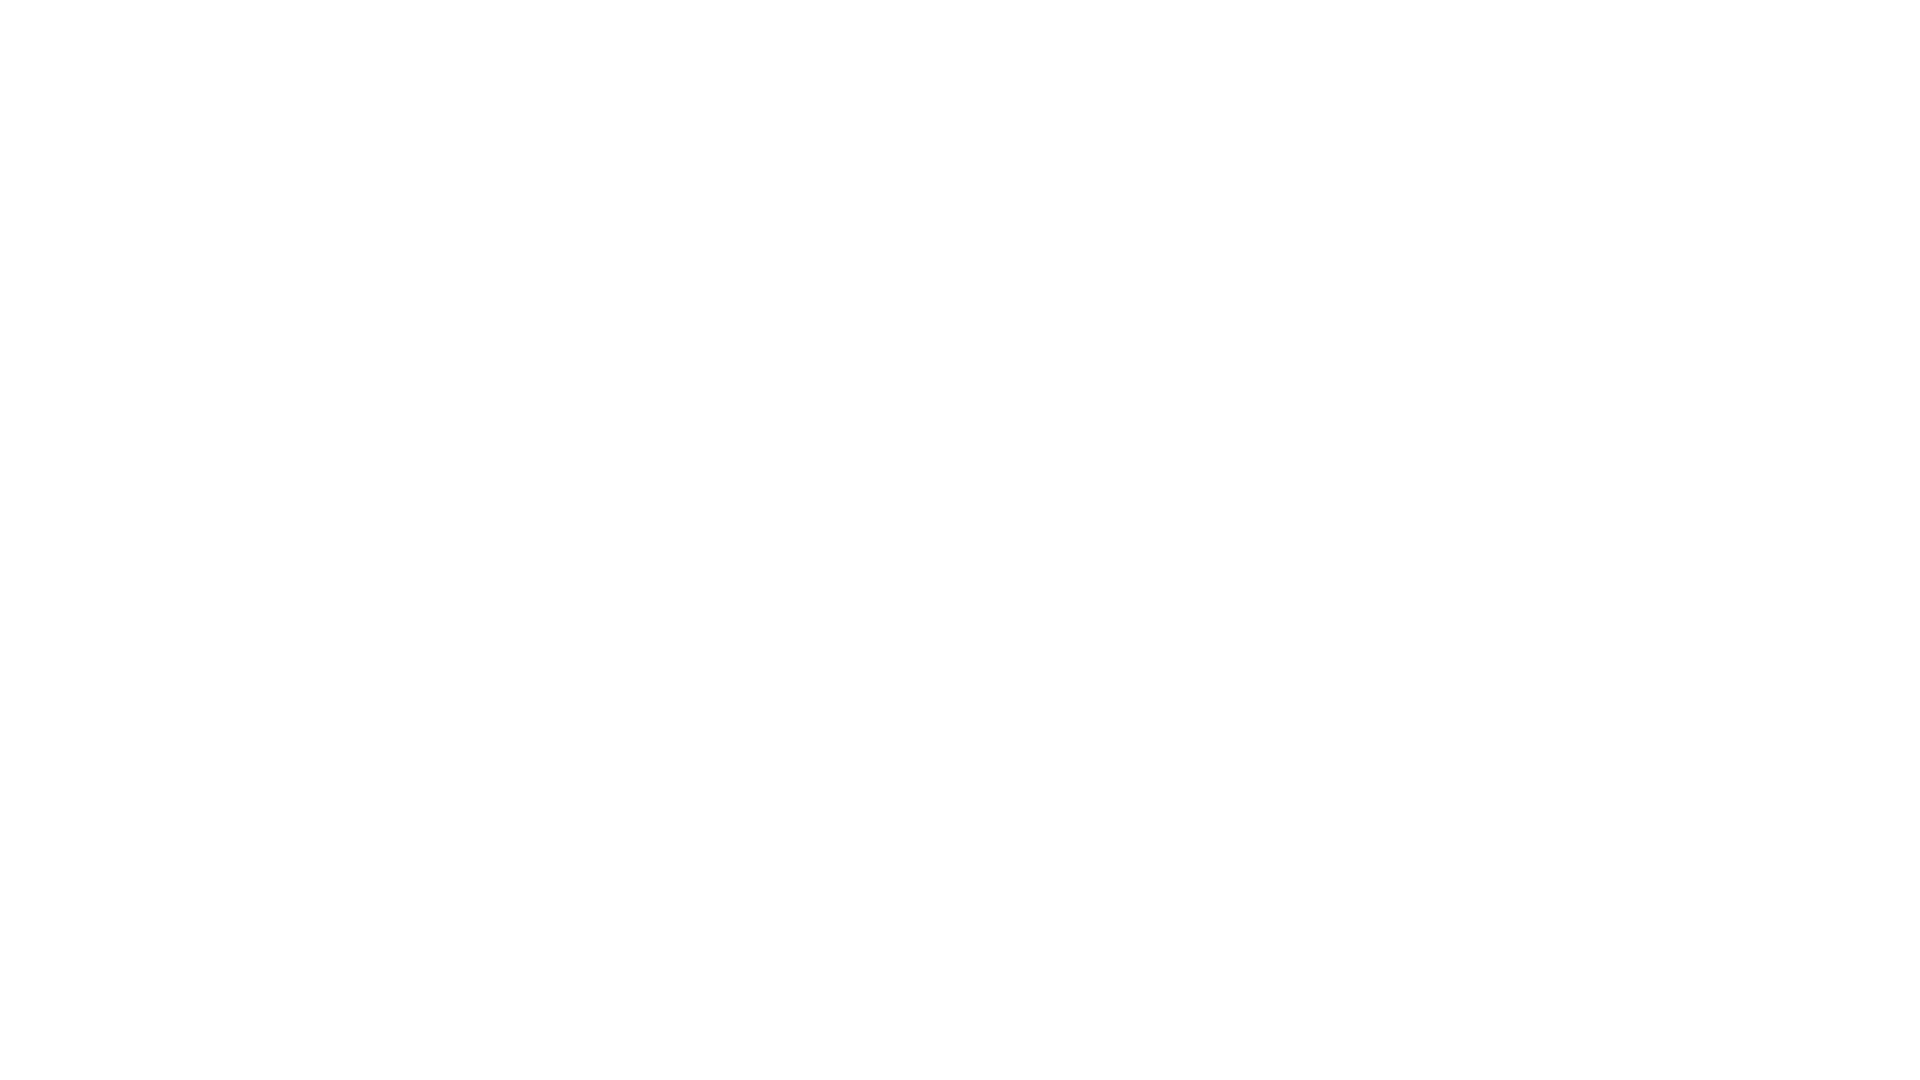
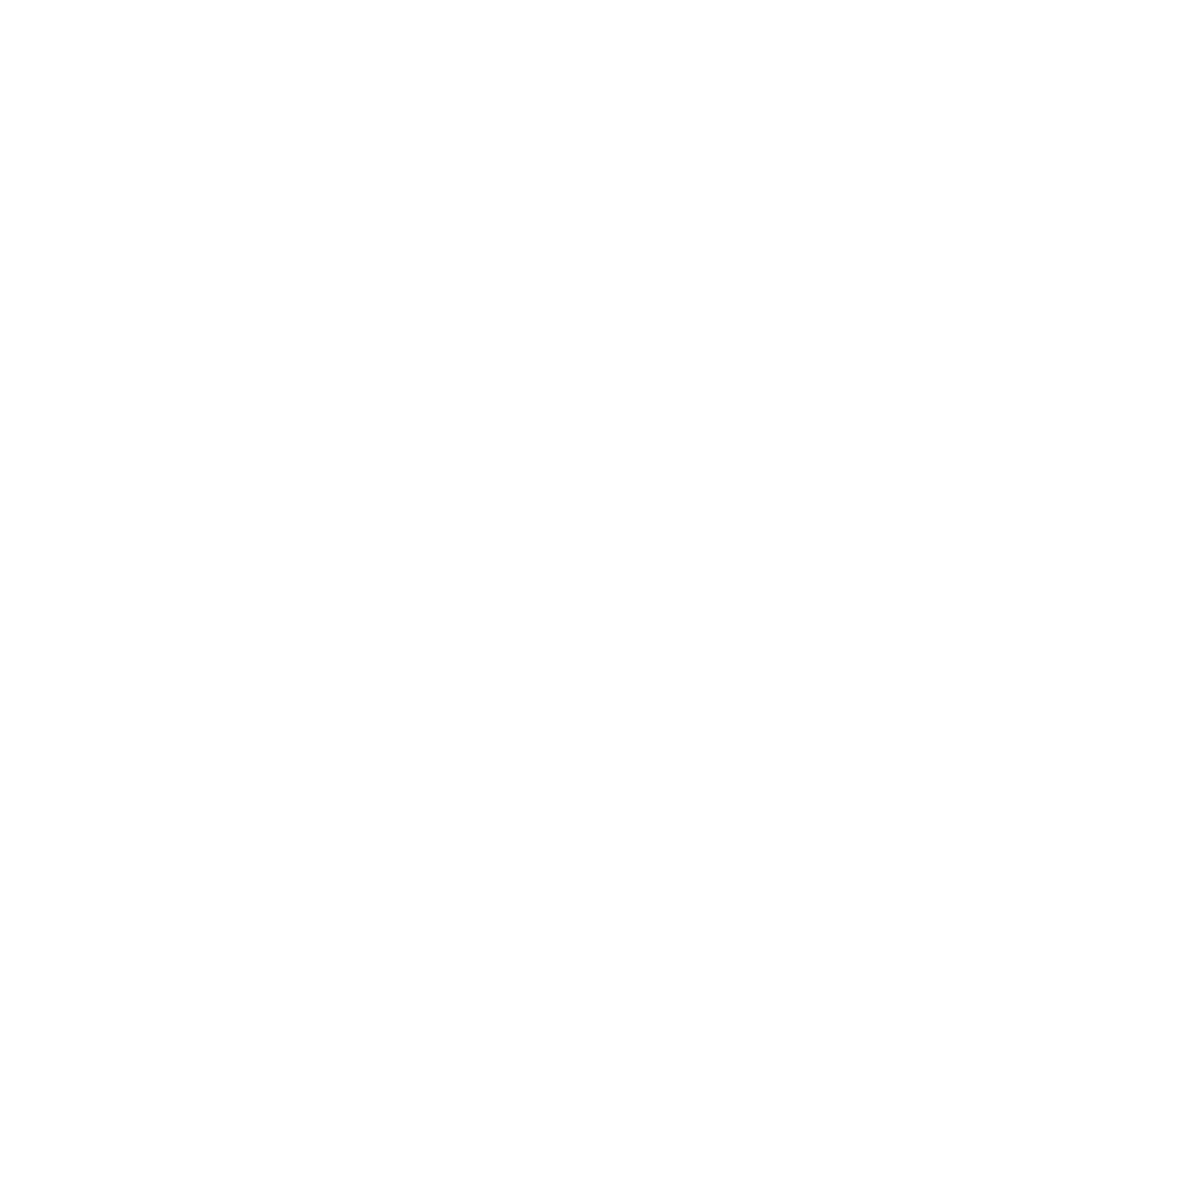

In [9]:
webpage

####  Successfulluy Obtain HTML Data using Header by avoiding 403 error

In [10]:
soup=BeautifulSoup(webpage,"lxml")

In [13]:
##Obtain The accurate html code
##lxml is html parser with the help of this parsiing and traversing of html become easy

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data
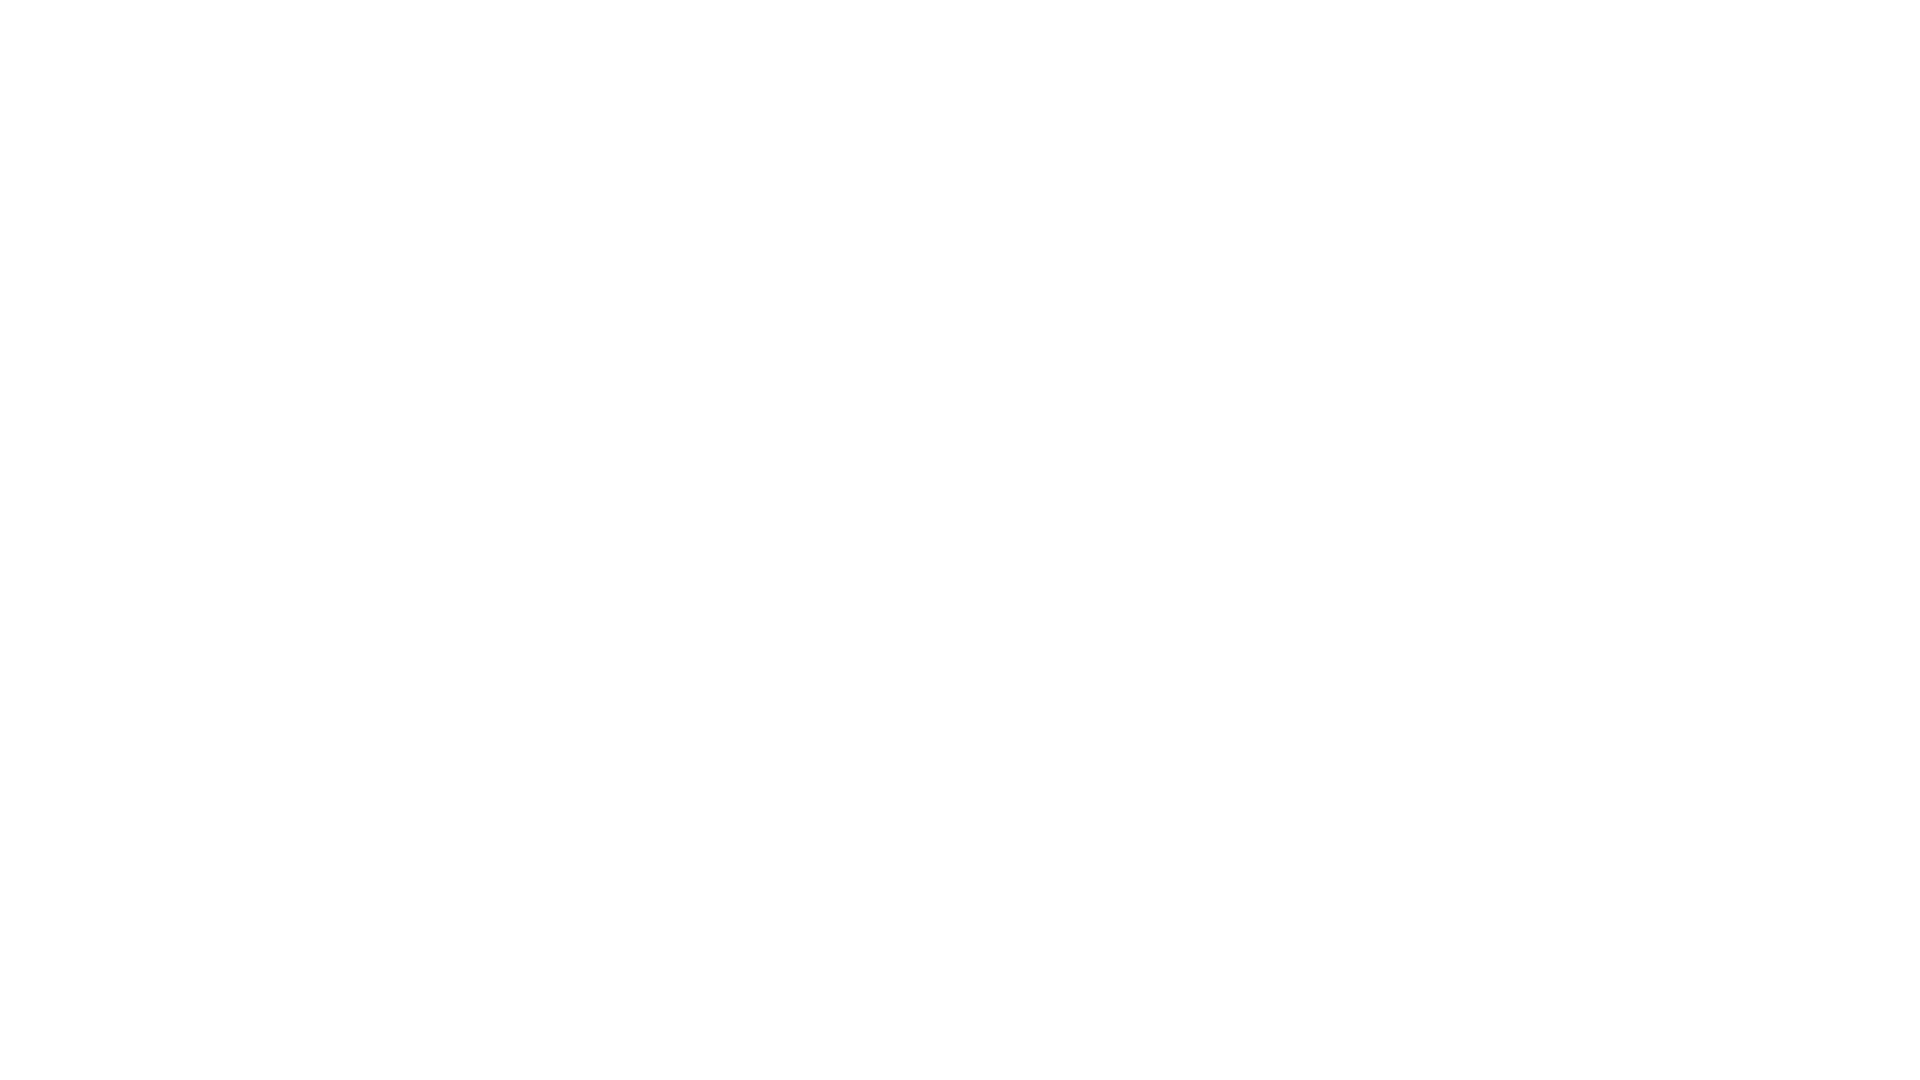
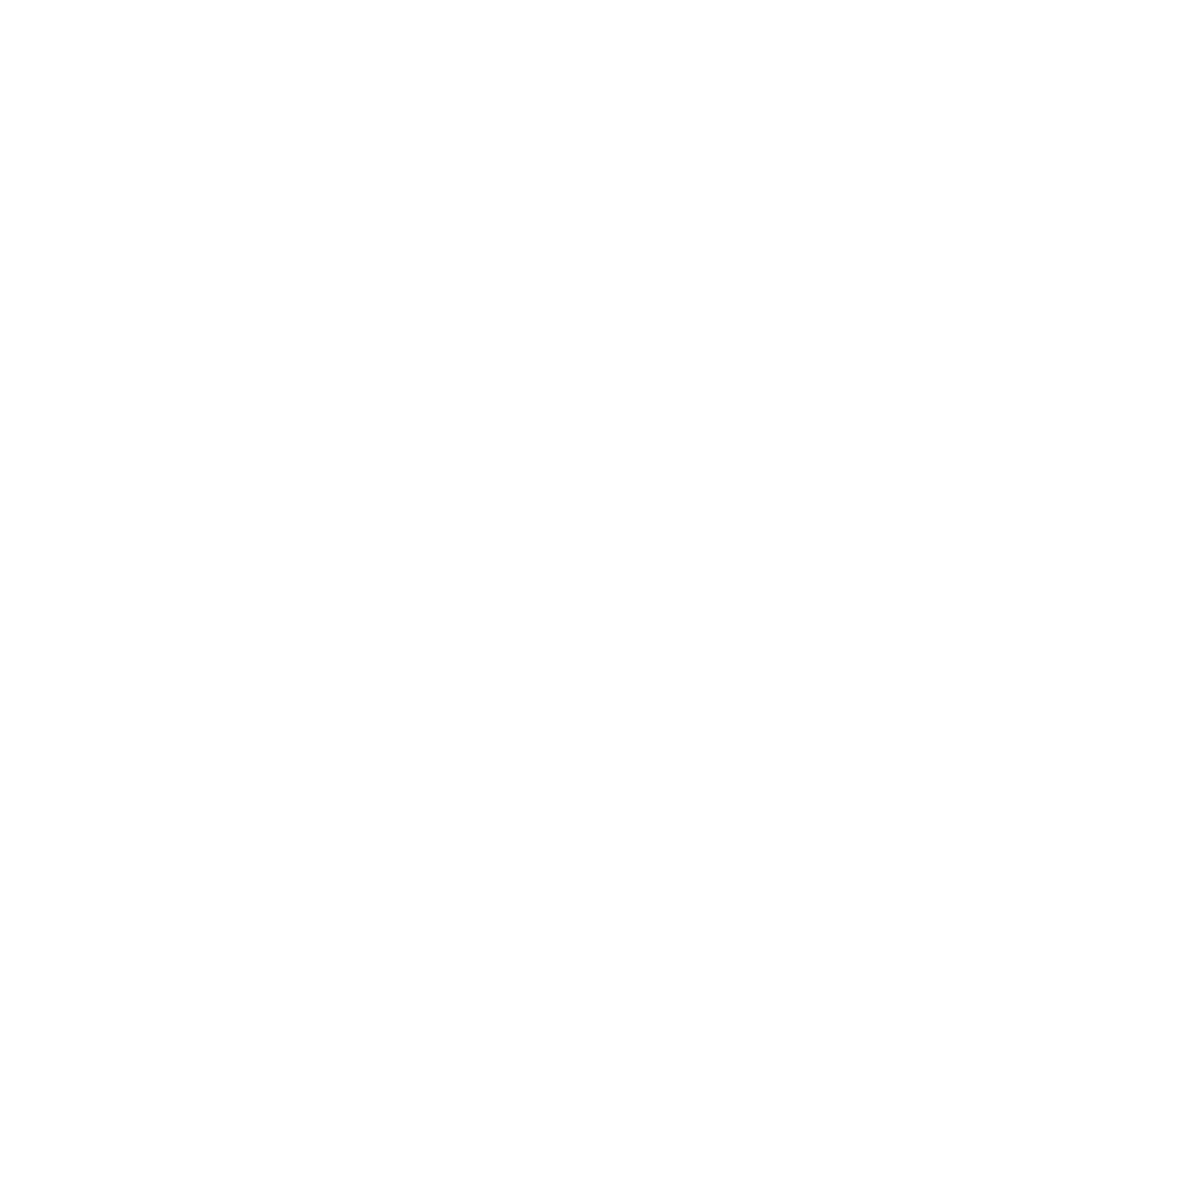

In [14]:
print(soup.prettify())

### Considering the whole container

In [20]:
company=soup.find_all('div',class_='companyCardWrapper')

In [23]:
len(company) ##Grabs the all containers on the same page

20

### Extracting Each information in the web using lists and for loop  and list indices for the element with same class and span

In [56]:
name=[]
rating=[]
reviews=[]
salaries=[]
interviews=[]
jobs=[]
benefits=[]
photos=[]

for i in company:
    
    name.append(i.find('h2').text.strip())
    rating.append(i.find('span',class_="companyCardWrapper__companyRatingValue").text.strip())
    reviews.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[0].text.strip())
    salaries.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[1].text.strip())
    interviews.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[2].text.strip())
    jobs.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[3].text.strip())
    benefits.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[4].text.strip())
    photos.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[5].text.strip())
    
    
df=pd.DataFrame({
    "name":name,
    "raing":rating,
    "reviews":reviews,
    "salaries":salaries,
    "interviews":interviews,
    "No.Of Jobs":jobs,
    "benefits":benefits,
    "photos":photos
})

In [59]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'Wipro',
 'HDFC Bank',
 'ICICI Bank',
 'Infosys',
 'Capgemini',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Axis Bank',
 'Concentrix Corporation',
 'Amazon',
 'Teleperformance',
 'Reliance Jio',
 'IBM',
 'Larsen & Toubro Limited',
 'Reliance Retail',
 'HDB Financial Services']

In [60]:
rating

['3.8',
 '4.0',
 '3.9',
 '3.8',
 '3.9',
 '4.0',
 '3.8',
 '3.8',
 '3.7',
 '3.7',
 '3.9',
 '3.8',
 '3.9',
 '4.1',
 '3.6',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '4.0']

In [61]:
jobs

['555',
 '7.7k',
 '487',
 '281',
 '287',
 '208',
 '747',
 '707',
 '528',
 '918',
 '1.1k',
 '321',
 '112',
 '679',
 '266',
 '141',
 '4k',
 '59',
 '245',
 '56']

In [57]:
df

,name,raing,reviews,salaries,interviews,No.Of Jobs,benefits,photos
0,TCS,3.8,70.7k,851.9k,5.9k,555,11.4k,75
1,Accenture,4.0,44.8k,581.5k,4.1k,7.7k,7k,39
2,Cognizant,3.9,40.3k,559.2k,3.5k,487,5.8k,62
3,Wipro,3.8,37.9k,413.1k,3.4k,281,4.9k,65
4,HDFC Bank,3.9,32.6k,131.6k,1.5k,287,3.2k,26
5,ICICI Bank,4.0,32.4k,143.1k,1.8k,208,3.7k,36
6,Infosys,3.8,30.7k,460.9k,4.6k,747,5.1k,78
7,Capgemini,3.8,28.6k,372.3k,2.3k,707,3.9k,28
8,HCLTech,3.7,27.3k,288.9k,2.4k,528,4k,34
9,Tech Mahindra,3.7,26.6k,251.4k,2.3k,918,3.5k,42


## Thus we extracted a information from the single page , to extract a info from a multiple pages use a for loop

# Creating Data from various pages

In [63]:
dataframe=pd.DataFrame()
for j in range(1,11):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage=requests.get("https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&.page0={}".format(j),headers=headers).text
    soup=BeautifulSoup(webpage,"lxml")
    company=soup.find_all('div',class_='companyCardWrapper')
    name=[]
    rating=[]
    reviews=[]
    salaries=[]
    interviews=[]
    jobs=[]
    benefits=[]
    photos=[]
    
    for i in company:
        
        name.append(i.find('h2').text.strip())
        rating.append(i.find('span',class_="companyCardWrapper__companyRatingValue").text.strip())
        reviews.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[0].text.strip())
        salaries.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[1].text.strip())
        interviews.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[2].text.strip())
        jobs.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[3].text.strip())
        benefits.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[4].text.strip())
        photos.append(i.find_all('span',class_="companyCardWrapper__ActionCount")[5].text.strip())
        
        
    df=pd.DataFrame({
        "name":name,
        "raing":rating,
        "reviews":reviews,
        "salaries":salaries,
        "interviews":interviews,
        "No.Of Jobs":jobs,
        "benefits":benefits,
        "photos":photos
    })
    dataframe= pd.concat([dataframe, df], ignore_index=True)
    

In [64]:
dataframe.head()

,name,raing,reviews,salaries,interviews,No.Of Jobs,benefits,photos
0,TCS,3.8,70.7k,851.9k,5.9k,555,11.4k,75
1,Accenture,4.0,44.8k,581.5k,4.1k,7.7k,7k,39
2,Cognizant,3.9,40.3k,559.2k,3.5k,487,5.8k,62
3,Wipro,3.8,37.9k,413.1k,3.4k,281,4.9k,65
4,HDFC Bank,3.9,32.6k,131.6k,1.5k,287,3.2k,26


In [65]:
dataframe.shape

(200, 8)

In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        200 non-null    object
 1   raing       200 non-null    object
 2   reviews     200 non-null    object
 3   salaries    200 non-null    object
 4   interviews  200 non-null    object
 5   No.Of Jobs  200 non-null    object
 6   benefits    200 non-null    object
 7   photos      200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


In [68]:
dataframe


,name,raing,reviews,salaries,interviews,No.Of Jobs,benefits,photos
0,TCS,3.8,70.7k,851.9k,5.9k,555,11.4k,75
1,Accenture,4.0,44.8k,581.5k,4.1k,7.7k,7k,39
2,Cognizant,3.9,40.3k,559.2k,3.5k,487,5.8k,62
3,Wipro,3.8,37.9k,413.1k,3.4k,281,4.9k,65
4,HDFC Bank,3.9,32.6k,131.6k,1.5k,287,3.2k,26
...,...,...,...,...,...,...,...,...
195,Reliance Jio,3.9,19.8k,67.2k,1.1k,141,2.6k,37
196,IBM,4.1,19.2k,224.1k,1.4k,4k,2.7k,16
197,Larsen & Toubro Limited,4.0,18.1k,78.9k,1k,59,2.9k,29
198,Reliance Retail,3.9,17.9k,57.6k,1.1k,245,2k,87


In [69]:
dataframe.to_csv("Company.csv")

In [70]:
pd.read_csv("Company.csv",nrows=50)

,Unnamed: 0,name,raing,reviews,salaries,interviews,No.Of Jobs,benefits,photos
0,0,TCS,3.8,70.7k,851.9k,5.9k,555,11.4k,75
1,1,Accenture,4.0,44.8k,581.5k,4.1k,7.7k,7k,39
2,2,Cognizant,3.9,40.3k,559.2k,3.5k,487,5.8k,62
3,3,Wipro,3.8,37.9k,413.1k,3.4k,281,4.9k,65
4,4,HDFC Bank,3.9,32.6k,131.6k,1.5k,287,3.2k,26
5,5,ICICI Bank,4.0,32.4k,143.1k,1.8k,208,3.7k,36
6,6,Infosys,3.8,30.7k,460.9k,4.6k,808,5.1k,78
7,7,Capgemini,3.8,28.6k,372.3k,2.3k,707,3.9k,28
8,8,HCLTech,3.7,27.3k,288.9k,2.4k,528,4k,34
9,9,Tech Mahindra,3.7,26.6k,251.4k,2.3k,918,3.5k,42


In [1]:
pd.read_csv("Company.csv")

NameError: name 'pd' is not defined